In [1]:
%matplotlib inline

# plotting tools
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# testing tools
from nose.tools import assert_equal, assert_is_instance, assert_is_not
from numpy.testing import assert_array_equal
from pandas.util.testing import assert_frame_equal

## Problem 1. Flight Cancellations by Month

### 1. Function: get_month_cancelled()

In [2]:
def get_month_cancelled(filepath):
    '''
    Reads the "Month" and "Cancelled" columns of a CSV file
    and returns a Pandas DataFrame with only one column "Cancelled"
    indexed by the months.
    
    Parameters
    ----------
    filename(str): The filename of the CSV file.
    
    Returns
    -------
    pd.DataFrame: "Cancelled" column, indexed by names of the months.
    '''
    
    df = pd.read_csv(filepath, encoding='latin-1', usecols=['Month','Cancelled'])
    df['Month']=df['Month'].map({1: 'January', 2:'February', 3:'March', 4:'April',
           5:'May', 6:'June', 7:'July', 8:'August',
           9:'September', 10:'October', 11:'November', 12:'December'})
    result=df.groupby("Month",sort=False).sum()
    result.index.name = None
    return result

In [3]:
csv_path = '2001.csv'
month_cancelled = get_month_cancelled(csv_path)
print(month_cancelled)

           Cancelled
January        19891
February       17448
March          17876
April          11414
May             9452
June           15509
July           11286
August         13318
September      99324
October         6850
November        4497
December        4333


In [4]:
p1_answer = pd.DataFrame(
    [19891, 17448, 17876, 11414,
     9452, 15509, 11286, 13318,
     99324, 6850, 4497, 4333],
    index=['January', 'February', 'March', 'April',
           'May', 'June', 'July', 'August',
           'September', 'October', 'November', 'December'],
    columns=['Cancelled']
    )

assert_frame_equal(month_cancelled, p1_answer)

### 2. Function: plot_month_cancelled()

In [11]:
def plot_month_cancelled(df):
    fig, ax = plt.subplots()
    df.plot(kind='bar',ax=ax)
    ax.set_title("Month Cancelled Plot")
    ax.set_xlabel("month")
    ax.set_ylabel("cancellation number")
    return ax

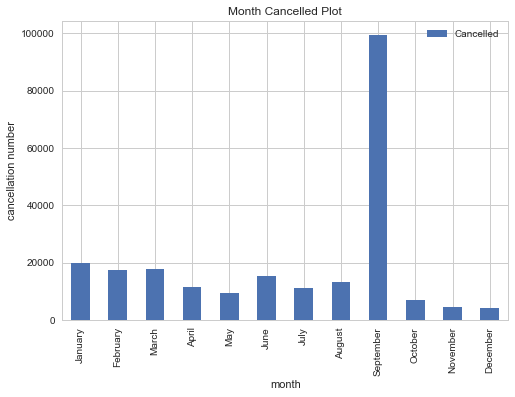

In [12]:
ax = plot_month_cancelled(month_cancelled)

In [13]:
# assertions
# check title, axis labels
assert_is_instance(
    ax, mpl.axes.Axes,
    msg="Your function should return a matplotlib.axes.Axes object."
)

assert_is_not(
    len(ax.title.get_text()), 0,
    msg="Your plot doesn't have a title."
)

assert_is_not(
    ax.xaxis.get_label_text(), '',
    msg="Change the x-axis label to something more descriptive."
)

assert_is_not(
    ax.yaxis.get_label_text(), '',
    msg="Change the y-axis label to something more descriptive."
)

# check data
assert_equal(
    len(ax.patches), 12,
    msg="Your plot does not have enough data patches."
)

xdata = [a.get_text() for a in ax.get_xticklabels()]
ydata = [p.get_height() for p in ax.patches]

assert_array_equal(xdata, month_cancelled.index)
assert_array_equal(ydata, month_cancelled['Cancelled'])

# check if your function can handle other dataframes
test_index = [str(i) for i in np.random.randint(20, size=20)]
test_data = np.random.randint(20, size=20)
test_df = pd.DataFrame(test_data, index=test_index, columns=['test'])

ax1 = plot_month_cancelled(test_df)

x1data = [a.get_text() for a in ax1.get_xticklabels()]
y1data = [p.get_height() for p in ax1.patches]

assert_array_equal(x1data, test_index)
assert_array_equal(y1data, test_data)

plt.close()

## Problem 2. Find Best Movies by Genres

In [15]:
movies = '/Users/Constance/ml-latest-small/movies.csv'
ratings = '/Users/Constance/ml-latest-small/ratings.csv'

# construct dataframes
mv = pd.read_csv(movies)
rt = pd.read_csv(ratings)

# filter out movies with less than 50 rating records
counts = rt['movieId'].value_counts()
rt = rt[rt['movieId'].isin(counts[counts>50].index)]

print(mv[:5])
print('\n--------------------------------------------------\n')
print(rt[:5])

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

--------------------------------------------------

    userId  movieId  rating   timestamp
8        1     1339     3.5  1260759125
16       1     2294     2.0  1260759108
19       1     3671     3.0  1260759117
20       2       10     4.0   835355493
21       2       17     5.0   835355681


### 1. Function: find_best_movies_by_genres()

In [48]:
def find_best_movies_by_genres(mv, rt, genres_type):
    '''
    Constructs a new pd.DataFrame from mv and rt using groupby(), merge(), 
    
    Parameters
    ----------
    mv(pd.DataFrame): movie information.
    rt(pd.DataFrame): rating information.
    genres_type(str): The filename of the CSV file.
    
    Returns
    -------
    pd.DataFrame: 3 columns (rating, title, genres), indexed by movieId.
    '''
    
    avrt=rt.groupby("movieId",as_index=False)['rating'].mean()
    mvrt=avrt.merge(mv, on='movieId')
    new=mvrt[(mvrt['rating']>=4.0)&(mvrt['genres'].str.contains(genres_type))]
    result=new.sort_values(by='rating',ascending=False)
    return result.set_index('movieId')

In [49]:
horror = find_best_movies_by_genres(mv, rt, 'Horror')
print(horror)

           rating                             title                 genres
movieId                                                                   
1219     4.253247                     Psycho (1960)           Crime|Horror
593      4.138158  Silence of the Lambs, The (1991)  Crime|Horror|Thriller
1258     4.029703               Shining, The (1980)                 Horror
2762     4.018135           Sixth Sense, The (1999)   Drama|Horror|Mystery


In [50]:
find_best_movies_by_genres(mv, rt, 'Animation')

,rating,title,genres
movieId,,,
745,4.193548,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy
5618,4.134921,Spirited Away (Sen to Chihiro no kamikakushi) ...,Adventure|Animation|Fantasy
1148,4.093333,Wallace & Gromit: The Wrong Trousers (1993),Animation|Children|Comedy|Crime
